### 0.) Import Modules and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

### 1.) Load and Explore Dataset

In [2]:
df1= pd.read_csv("MushroomDataset/primary_data.csv", sep=';')
df1=pd.DataFrame(df1)
df1

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,NaN,[g],[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s]


In [3]:
df2= pd.read_csv("MushroomDataset/secondary_data.csv", sep=';')
df2=pd.DataFrame(df2)
df2

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


### 1.1.) Primary Dataset

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           133 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       145 non-null    object
 9   gill-spacing          102 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             27 non-null     object
 14  stem-surface          65 non-null     object
 15  stem-color            173 non-null    ob

In [5]:
df1.describe()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
count,173,173,173,173,173,133,173,173,145,102,...,27,65,173,9,21,173,166,18,173,173
unique,23,173,2,51,27,40,67,2,8,3,...,5,14,41,1,7,2,13,8,21,10
top,Tricholoma Family,Fly Agaric,p,"[2, 5]",[x],[y],[n],[f],[a],[c],...,[s],[s],[w],[u],[w],[f],[f],[k],[d],"[u, a]"
freq,43,1,96,16,48,14,38,143,32,70,...,9,15,57,9,15,130,137,5,104,106


In [6]:
# Show minmax columns
df1[['cap-diameter', 'stem-height', 'stem-width']]

,cap-diameter,stem-height,stem-width
0,"[10, 20]","[15, 20]","[15, 20]"
1,"[5, 10]","[6, 10]","[10, 20]"
2,"[10, 15]","[10, 12]","[10, 20]"
3,"[5, 15]","[7, 15]","[10, 25]"
4,"[5, 12]","[10, 12]","[10, 20]"
...,...,...,...
168,"[2, 6]","[4, 7]","[20, 40]"
169,"[2, 4]","[2, 5]","[10, 20]"
170,"[5, 15]","[2, 5]","[20, 30]"
171,"[3, 8]","[3, 8]","[15, 25]"


In [7]:
# Convert minmax columns [...,...] to float
minmax_columns = ['cap-diameter', 'stem-height', 'stem-width']

for c in minmax_columns:
    df1[c] = df1[c].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])
    for row in range (len(df1[c])):
        df1[c][row] = statistics.mean(df1[c][row])

df1.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,15.0,"[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,7.5,"[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,12.5,"[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,10.0,"[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,8.5,"[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


In [8]:
# Average of minmax columns
df1[minmax_columns] = df1[minmax_columns].astype(float)
df1[['cap-diameter', 'stem-height', 'stem-width']]

,cap-diameter,stem-height,stem-width
0,15.00,17.5,17.5
1,7.50,8.0,15.0
2,12.50,11.0,15.0
3,10.00,11.0,17.5
4,8.50,11.0,15.0
...,...,...,...
168,4.00,5.5,30.0
169,3.00,3.5,15.0
170,10.00,3.5,25.0
171,5.50,5.5,20.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   family                173 non-null    object 
 1   name                  173 non-null    object 
 2   class                 173 non-null    object 
 3   cap-diameter          173 non-null    float64
 4   cap-shape             173 non-null    object 
 5   Cap-surface           133 non-null    object 
 6   cap-color             173 non-null    object 
 7   does-bruise-or-bleed  173 non-null    object 
 8   gill-attachment       145 non-null    object 
 9   gill-spacing          102 non-null    object 
 10  gill-color            173 non-null    object 
 11  stem-height           173 non-null    float64
 12  stem-width            173 non-null    float64
 13  stem-root             27 non-null     object 
 14  stem-surface          65 non-null     object 
 15  stem-color            1

In [10]:
df1.describe()

,cap-diameter,stem-height,stem-width
count,173.000000,173.000000,173.000000
mean,6.739306,6.589595,12.157514
std,5.140185,3.264824,9.858009
min,0.700000,0.000000,0.000000
25%,3.500000,4.500000,5.500000
50%,6.000000,6.000000,10.000000
75%,8.500000,7.500000,15.000000
max,50.000000,25.000000,70.000000


In [11]:
# Count both poisonous and editable
df1.groupby('class').count()

,family,name,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
class,,,,,,,,,,,,,,,,,,,,,
e,77,77,77,77,58,77,77,67,46,77,...,10,24,77,3,9,77,73,5,77,77
p,96,96,96,96,75,96,96,78,56,96,...,17,41,96,6,12,96,93,13,96,96


In [12]:
# Show percentage of class poisonous and editable
df1.groupby('class').size() / len(df1) * 100

class
e    44.508671
p    55.491329
dtype: float64

In [13]:
# Auto-Correlation: 'cap-diameter', 'stem-height', 'stem-width'
auto_corr = df1.corr()
print("Auto Correlations: ")
print(auto_corr)

Auto Correlations: 
              cap-diameter  stem-height  stem-width
cap-diameter      1.000000     0.425577    0.710068
stem-height       0.425577     1.000000    0.433962
stem-width        0.710068     0.433962    1.000000


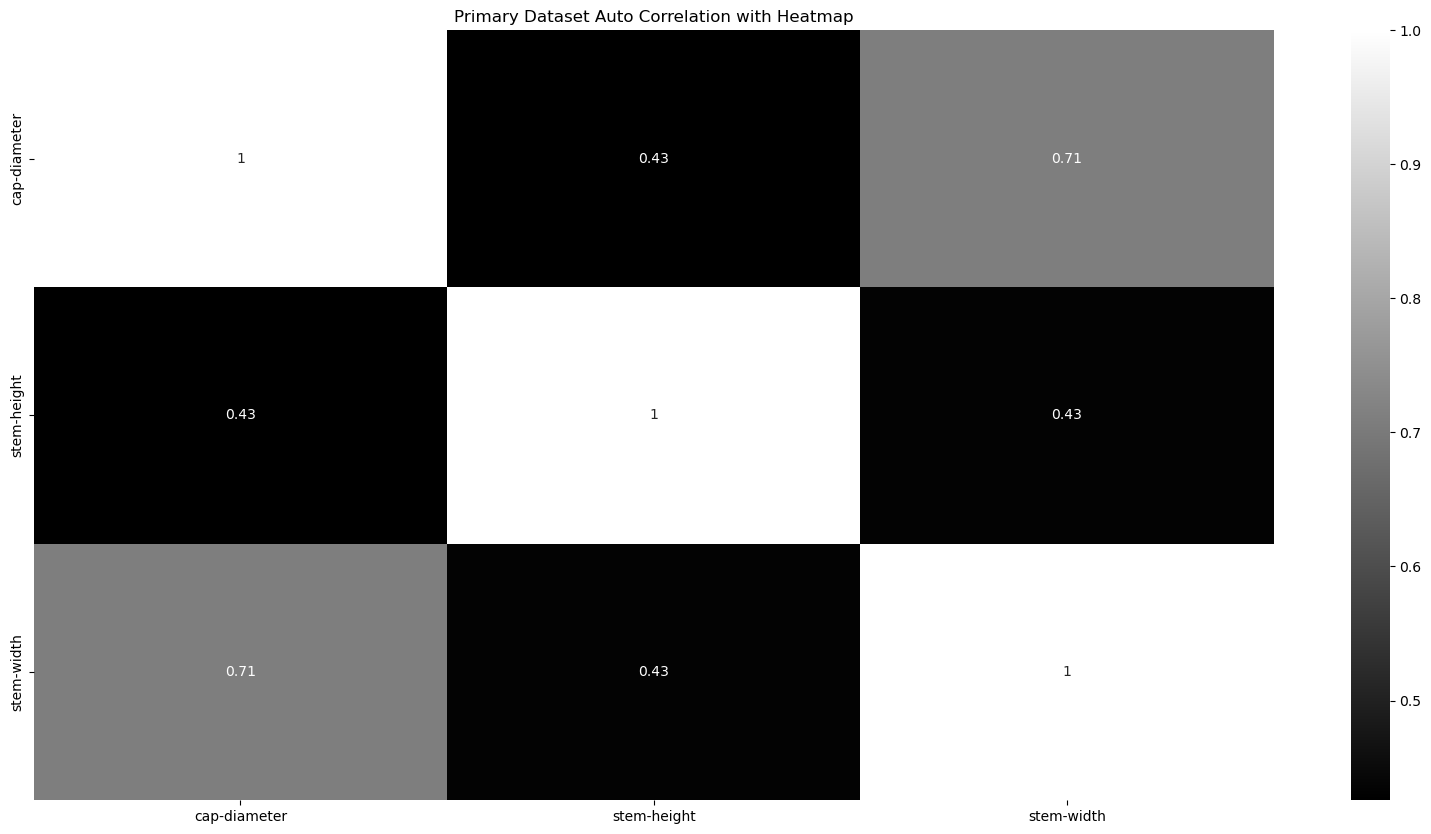

In [14]:
# Auto-Correlation - Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(auto_corr, annot=True, cmap="gray")
plt.title('Primary Dataset Auto Correlation with Heatmap')
plt.show()

### 1.2.) Secondary Dataset

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [16]:
df2.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [17]:
# Count both poisonous and editable
df2.groupby('class').count()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
class,,,,,,,,,,,,,,,,,,,,
e,27181,27181,20474,27181,27181,23651,16238,27181,27181,27181,3530,8472,27181,1059,3177,27181,25769,1765,27181,27181
p,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888


In [18]:
# Show percentage of class poisonous and editable
df2.groupby('class').size() / len(df2) * 100

class
e    44.508671
p    55.491329
dtype: float64

In [19]:
# Auto-Correlation: 'cap-diameter', 'stem-height', 'stem-width'
auto_corr = df2.corr()
print("Auto Correlations: ")
print(auto_corr)

Auto Correlations: 
              cap-diameter  stem-height  stem-width
cap-diameter       1.00000     0.422560    0.695330
stem-height        0.42256     1.000000    0.436117
stem-width         0.69533     0.436117    1.000000


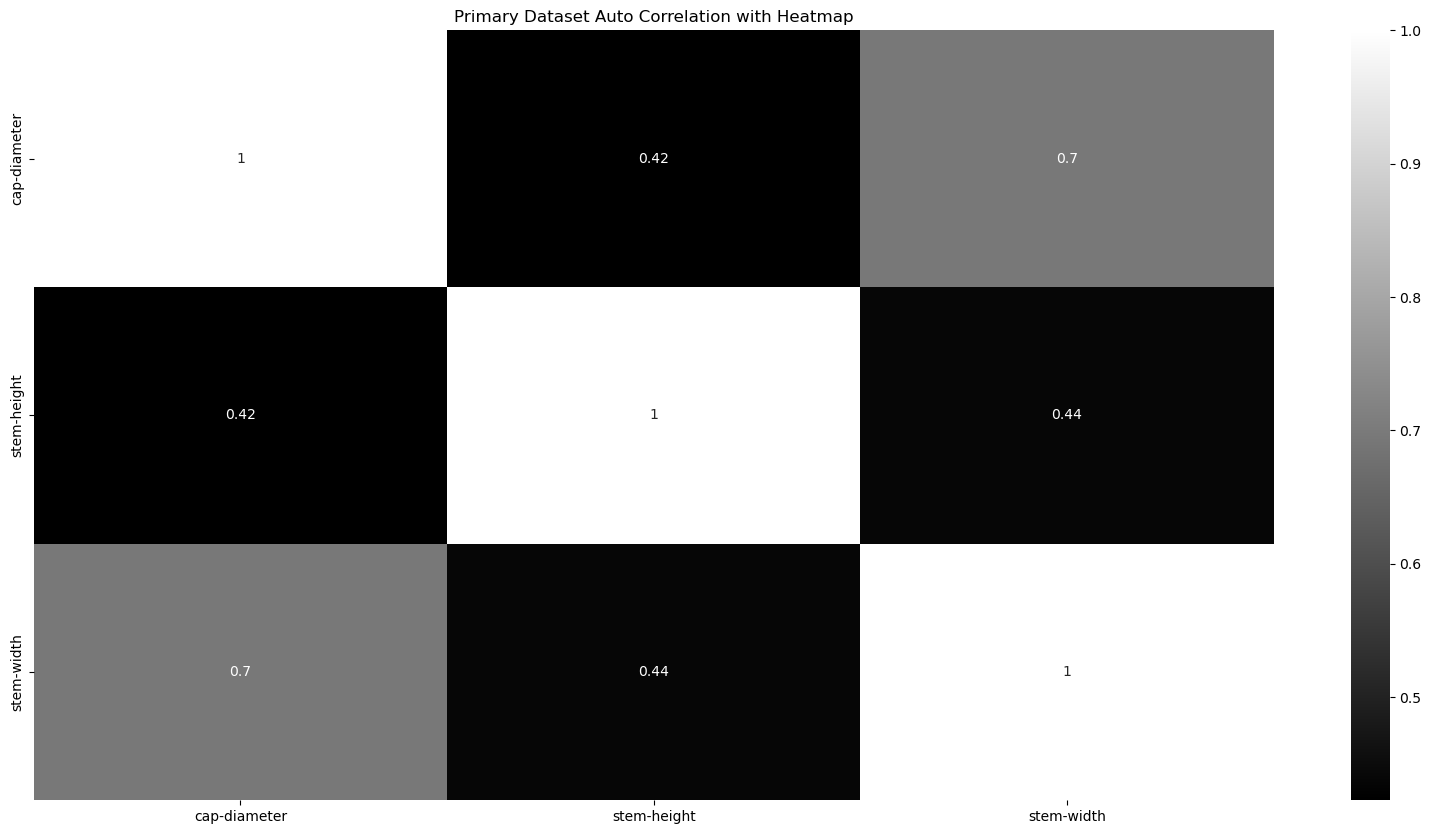

In [20]:
# Auto-Correlation - Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(auto_corr, annot=True, cmap="gray")
plt.title('Primary Dataset Auto Correlation with Heatmap')
plt.show()

### 2.) Dealing with Missing Value

### 2.1.) Primary Dataset

In [21]:
print("Total number of missing value")
df1.isna().sum()

Total number of missing value


family                    0
name                      0
class                     0
cap-diameter              0
cap-shape                 0
Cap-surface              40
cap-color                 0
does-bruise-or-bleed      0
gill-attachment          28
gill-spacing             71
gill-color                0
stem-height               0
stem-width                0
stem-root               146
stem-surface            108
stem-color                0
veil-type               164
veil-color              152
has-ring                  0
ring-type                 7
Spore-print-color       155
habitat                   0
season                    0
dtype: int64

In [22]:
print("Ratio of each missing value")
df1_missing_ratio = df1.isna().mean()
print()
for index, value in df1_missing_ratio.items():
    print(f"{index}: {value:.2f}%")

Ratio of each missing value

family: 0.00%
name: 0.00%
class: 0.00%
cap-diameter: 0.00%
cap-shape: 0.00%
Cap-surface: 0.23%
cap-color: 0.00%
does-bruise-or-bleed: 0.00%
gill-attachment: 0.16%
gill-spacing: 0.41%
gill-color: 0.00%
stem-height: 0.00%
stem-width: 0.00%
stem-root: 0.84%
stem-surface: 0.62%
stem-color: 0.00%
veil-type: 0.95%
veil-color: 0.88%
has-ring: 0.00%
ring-type: 0.04%
Spore-print-color: 0.90%
habitat: 0.00%
season: 0.00%


In [23]:
print("Removing Variables")
print()
print(df1.loc[:, df1_missing_ratio > .5])

Removing Variables

    stem-root stem-surface veil-type veil-color Spore-print-color
0         [s]          [y]       [u]        [w]               NaN
1         NaN          [y]       [u]        [w]               NaN
2         NaN          NaN       [u]        [w]               NaN
3         [b]          NaN       [u]        [w]               NaN
4         NaN          NaN       [u]        [w]               NaN
..        ...          ...       ...        ...               ...
168       NaN          [g]       NaN        NaN               NaN
169       NaN          [g]       NaN        NaN               NaN
170       NaN          [g]       NaN        NaN               NaN
171       NaN          NaN       NaN        NaN               NaN
172       NaN          NaN       NaN        NaN               NaN

[173 rows x 5 columns]


In [24]:
# New dataset for Primary Dataset
df1 = df1.loc[:, df1.isnull().mean() < .5]
df1

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,Amanita Family,Fly Agaric,p,15.00,"[x, f]","[g, h]","[e, o]",[f],[e],NaN,[w],17.5,17.5,[w],[t],"[g, p]",[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,7.50,"[p, x]",[g],[n],[f],[e],NaN,[w],8.0,15.0,[w],[t],[p],[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,12.50,"[x, f]",NaN,"[g, n]",[f],[e],NaN,[w],11.0,15.0,[w],[t],"[e, g]",[d],"[u, a]"
3,Amanita Family,The Blusher,e,10.00,"[x, f]",NaN,[n],[t],NaN,NaN,[w],11.0,17.5,[w],[t],[g],[d],"[u, a]"
4,Amanita Family,Death Cap,p,8.50,"[x, f]",[h],[r],[f],NaN,[c],[w],11.0,15.0,[w],[t],"[g, p]",[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,4.00,[o],NaN,[w],[f],[f],[f],[f],5.5,30.0,[w],[t],[f],"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,3.00,[o],NaN,"[g, k]",[f],[f],[f],[f],3.5,15.0,"[g, n]",[f],[f],[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,10.00,[o],NaN,"[n, e]",[f],[f],[f],[f],3.5,25.0,[n],[f],[f],[d],"[s, u]"
171,Morel Family,Common Morel,e,5.50,"[p, c, o]",NaN,"[n, g]",[f],[f],[f],[f],5.5,20.0,[n],[f],[f],"[l, d]",[s]


In [25]:
df1.isna().sum()

family                   0
name                     0
class                    0
cap-diameter             0
cap-shape                0
Cap-surface             40
cap-color                0
does-bruise-or-bleed     0
gill-attachment         28
gill-spacing            71
gill-color               0
stem-height              0
stem-width               0
stem-color               0
has-ring                 0
ring-type                7
habitat                  0
season                   0
dtype: int64

In [26]:
# Replacing NaN value with th most frequent value (mode)
missing_columns = df1.columns[df1.isna().any()]

for column in missing_columns:
    most_frequent_value = df1[column].mode()[0]
    df1[column].fillna(most_frequent_value, inplace=True)

In [27]:
# Check the remaining data
df1.isna().sum()

family                  0
name                    0
class                   0
cap-diameter            0
cap-shape               0
Cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### 2.2.) Secondary Dataset

In [28]:
print("Total number of missing value")
df2.isna().sum()

Total number of missing value


class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [29]:
print("Ratio of each missing value")
df2_missing_ratio = df2.isna().mean()
print()
for index, value in df2_missing_ratio.items():
    print(f"{index}: {value:.2f}%")

Ratio of each missing value

class: 0.00%
cap-diameter: 0.00%
cap-shape: 0.00%
cap-surface: 0.23%
cap-color: 0.00%
does-bruise-or-bleed: 0.00%
gill-attachment: 0.16%
gill-spacing: 0.41%
gill-color: 0.00%
stem-height: 0.00%
stem-width: 0.00%
stem-root: 0.84%
stem-surface: 0.62%
stem-color: 0.00%
veil-type: 0.95%
veil-color: 0.88%
has-ring: 0.00%
ring-type: 0.04%
spore-print-color: 0.90%
habitat: 0.00%
season: 0.00%


In [30]:
print("Removing Variables")
print()
print(df2.loc[:, df2_missing_ratio > .5])

Removing Variables

      stem-root stem-surface veil-type veil-color spore-print-color
0             s            y         u          w               NaN
1             s            y         u          w               NaN
2             s            y         u          w               NaN
3             s            y         u          w               NaN
4             s            y         u          w               NaN
...         ...          ...       ...        ...               ...
61064       NaN          NaN       NaN        NaN               NaN
61065       NaN          NaN       NaN        NaN               NaN
61066       NaN          NaN       NaN        NaN               NaN
61067       NaN          NaN       NaN        NaN               NaN
61068       NaN          NaN       NaN        NaN               NaN

[61069 rows x 5 columns]


In [31]:
# New dataset for Secondary Dataset
df2 = df2.loc[:, df2.isnull().mean() < .5]
df2

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,y,f,f,d,u


In [32]:
df2.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [33]:
# Replacing NaN value with th most frequent value (mode)
missing_columns = df2.columns[df2.isna().any()]

for column in missing_columns:
    most_frequent_value = df2[column].mode()[0]
    df2[column].fillna(most_frequent_value, inplace=True)

In [34]:
# Check the remaining data
df2.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### 3.) Data Transformation and Encoding

### 3.1.) Primary Dataset

In [35]:
# New Primary Dataset (after dealing with missing value)
df1

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,Amanita Family,Fly Agaric,p,15.00,"[x, f]","[g, h]","[e, o]",[f],[e],[c],[w],17.5,17.5,[w],[t],"[g, p]",[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,7.50,"[p, x]",[g],[n],[f],[e],[c],[w],8.0,15.0,[w],[t],[p],[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,12.50,"[x, f]",[y],"[g, n]",[f],[e],[c],[w],11.0,15.0,[w],[t],"[e, g]",[d],"[u, a]"
3,Amanita Family,The Blusher,e,10.00,"[x, f]",[y],[n],[t],[a],[c],[w],11.0,17.5,[w],[t],[g],[d],"[u, a]"
4,Amanita Family,Death Cap,p,8.50,"[x, f]",[h],[r],[f],[a],[c],[w],11.0,15.0,[w],[t],"[g, p]",[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,4.00,[o],[y],[w],[f],[f],[f],[f],5.5,30.0,[w],[t],[f],"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,3.00,[o],[y],"[g, k]",[f],[f],[f],[f],3.5,15.0,"[g, n]",[f],[f],[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,10.00,[o],[y],"[n, e]",[f],[f],[f],[f],3.5,25.0,[n],[f],[f],[d],"[s, u]"
171,Morel Family,Common Morel,e,5.50,"[p, c, o]",[y],"[n, g]",[f],[f],[f],[f],5.5,20.0,[n],[f],[f],"[l, d]",[s]


In [36]:
# Show unique value for each columns
for col in df1:
    print(df1[col].unique())

['Amanita Family' 'Lepiota Family' 'Tricholoma Family' 'Wax Gill Family'
 'Russula Family' 'Pluteus Family' 'Entoloma Family' 'Bolbitius Family'
 'Stropharia Family' 'Cortinarius Family' 'Mushroom Family'
 'Ink Cap Family' 'Bolete Family' 'Paxillus Family' 'Chanterelle Family'
 'Oyster Mushroom Family' 'Crepidotus Family' 'Hydnum Family'
 'Ear-Pick Family' 'Bracket Fungi' 'Saddle-Cup Family' 'Morel Family'
 'Jelly Discs Family']
['Fly Agaric' 'Panther Cap' 'False Panther Cap' 'The Blusher' 'Death Cap'
 'False Death Cap' 'Destroying Angel' 'Tawny Grisette' 'Parasol Mushroom'
 'Shaggy Parasol' 'Stinking Parasol' 'Saffron Parasol' 'The Deceiver'
 'Amethyst Deceiver' 'Wood Blewit' 'Field Blewit' 'Clouded Agaric'
 'Club-footed Funnel Cap' 'Common Funnel Cap' 'Aniseed Funnel Cap'
 'Ivory Clitocybe' 'Wood Woolly-foot' 'Russet Tough Shank'
 'Clustered Tough Shank' 'Greasy Tough Shank' 'Spotted Tough Shank'
 'Fairy Ring Champignon' 'Little Wheel Fungus' 'Horse-hair Fungus'
 'Bonnet Bell Cap' 'S

In [37]:
# Find if data is binary or non binary value
df1.apply(lambda x: x.nunique() == 2)

family                  False
name                    False
class                    True
cap-diameter            False
cap-shape               False
Cap-surface             False
cap-color               False
does-bruise-or-bleed     True
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-color              False
has-ring                 True
ring-type               False
habitat                 False
season                  False
dtype: bool

In [38]:
# Find each type of variable
df2.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [39]:
for col in df1.columns:
    # Keep/skip qunatative data
    if df1[col].dtype.kind in ['i', 'f']:
        continue
    # Check if the column is binary
    elif df1[col].nunique() == 2:
        # Encode binary variables using LabelEncoder
        label_encoder = LabelEncoder()
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        # Encode nominal variables using OneHotEncoder
        onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoded_features = onehot_encoder.fit_transform(df1[[col]])
    
        encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out([col]))
        df1 = pd.concat([df1.drop(columns=[col]), encoded_df], axis=1)

In [40]:
# New Primary Dataset (after encoded)
df1

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,family_Amanita Family,family_Bolbitius Family,family_Bolete Family,family_Bracket Fungi,...,"season_[a, w]",season_[a],"season_[s, a, w]","season_[s, u, a, w]","season_[s, u, a]","season_[s, u]",season_[s],"season_[u, a, w]","season_[u, a]",season_[u]
0,1,15.00,0,17.5,17.5,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,7.50,0,8.0,15.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,12.50,0,11.0,15.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,10.00,1,11.0,17.5,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,8.50,0,11.0,15.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,4.00,0,5.5,30.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
169,1,3.00,0,3.5,15.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
170,1,10.00,0,3.5,25.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
171,0,5.50,0,5.5,20.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 3.2.) Secondary Dataset

In [41]:
# New Secondary Dataset (after dealing with missing value)
df2

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,y,f,f,d,u


In [42]:
# Show unique value for each columns
for col in df2:
    print(df2[col].unique())

['p' 'e']
[15.26 16.6  14.07 ... 22.85 21.8  20.42]
['x' 'f' 'p' 'b' 'c' 's' 'o']
['g' 'h' 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['f' 't']
['e' 'a' 'd' 's' 'x' 'p' 'f']
['c' 'd' 'f']
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
[17.09 18.19 17.74 ... 32.59 30.99 30.51]
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['t' 'f']
['g' 'p' 'e' 'l' 'f' 'm' 'r' 'z']
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
['w' 'u' 'a' 's']


In [43]:
# Find if data is binary or non binary value
df2.apply(lambda x: x.nunique() == 2)

class                    True
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed     True
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-color              False
has-ring                 True
ring-type               False
habitat                 False
season                  False
dtype: bool

In [44]:
# Find each type of variable
df2.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [45]:
for col in df2.columns:
    # Keep/skip qunatative data
    if df2[col].dtype.kind in ['i', 'f']:
        continue
    # Check if the column is binary
    elif df2[col].nunique() == 2:
        # Encode binary variables using LabelEncoder
        label_encoder = LabelEncoder()
        df2[col] = label_encoder.fit_transform(df2[col])
    else:
        # Encode nominal variables using OneHotEncoder
        onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoded_features = onehot_encoder.fit_transform(df2[[col]])
    
        encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out([col]))
        df2 = pd.concat([df2.drop(columns=[col]), encoded_df], axis=1)

In [46]:
# New Secondary Dataset (after encoded)
df2

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1,15.26,0,16.95,17.09,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,16.60,0,17.99,18.19,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,14.07,0,17.80,17.74,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,14.17,0,15.77,15.98,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,14.64,0,16.53,17.20,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,0,3.93,6.22,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,1,1.27,0,3.18,5.43,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,1,1.27,0,3.86,6.37,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61067,1,1.24,0,3.56,5.44,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4.) Showing Correlation

### 4.1.) Primary Dataset

In [47]:
corr_matrix = df1.corr()
print("Auto Correlations: ")
print(corr_matrix)

Auto Correlations: 
                         class  cap-diameter  does-bruise-or-bleed  \
class                 1.000000     -0.186252             -0.019889   
cap-diameter         -0.186252      1.000000              0.184156   
does-bruise-or-bleed -0.019889      0.184156              1.000000   
stem-height          -0.127199      0.425577              0.078848   
stem-width           -0.201006      0.710068              0.188370   
...                        ...           ...                   ...   
season_[s, u]        -0.059229      0.417139             -0.060846   
season_[s]           -0.085139     -0.018437             -0.034924   
season_[u, a, w]     -0.121723      0.122640             -0.064955   
season_[u, a]         0.099785     -0.088479              0.207437   
season_[u]            0.068288     -0.025876             -0.034924   

                      stem-height  stem-width  has-ring  \
class                   -0.127199   -0.201006  0.057559   
cap-diameter         

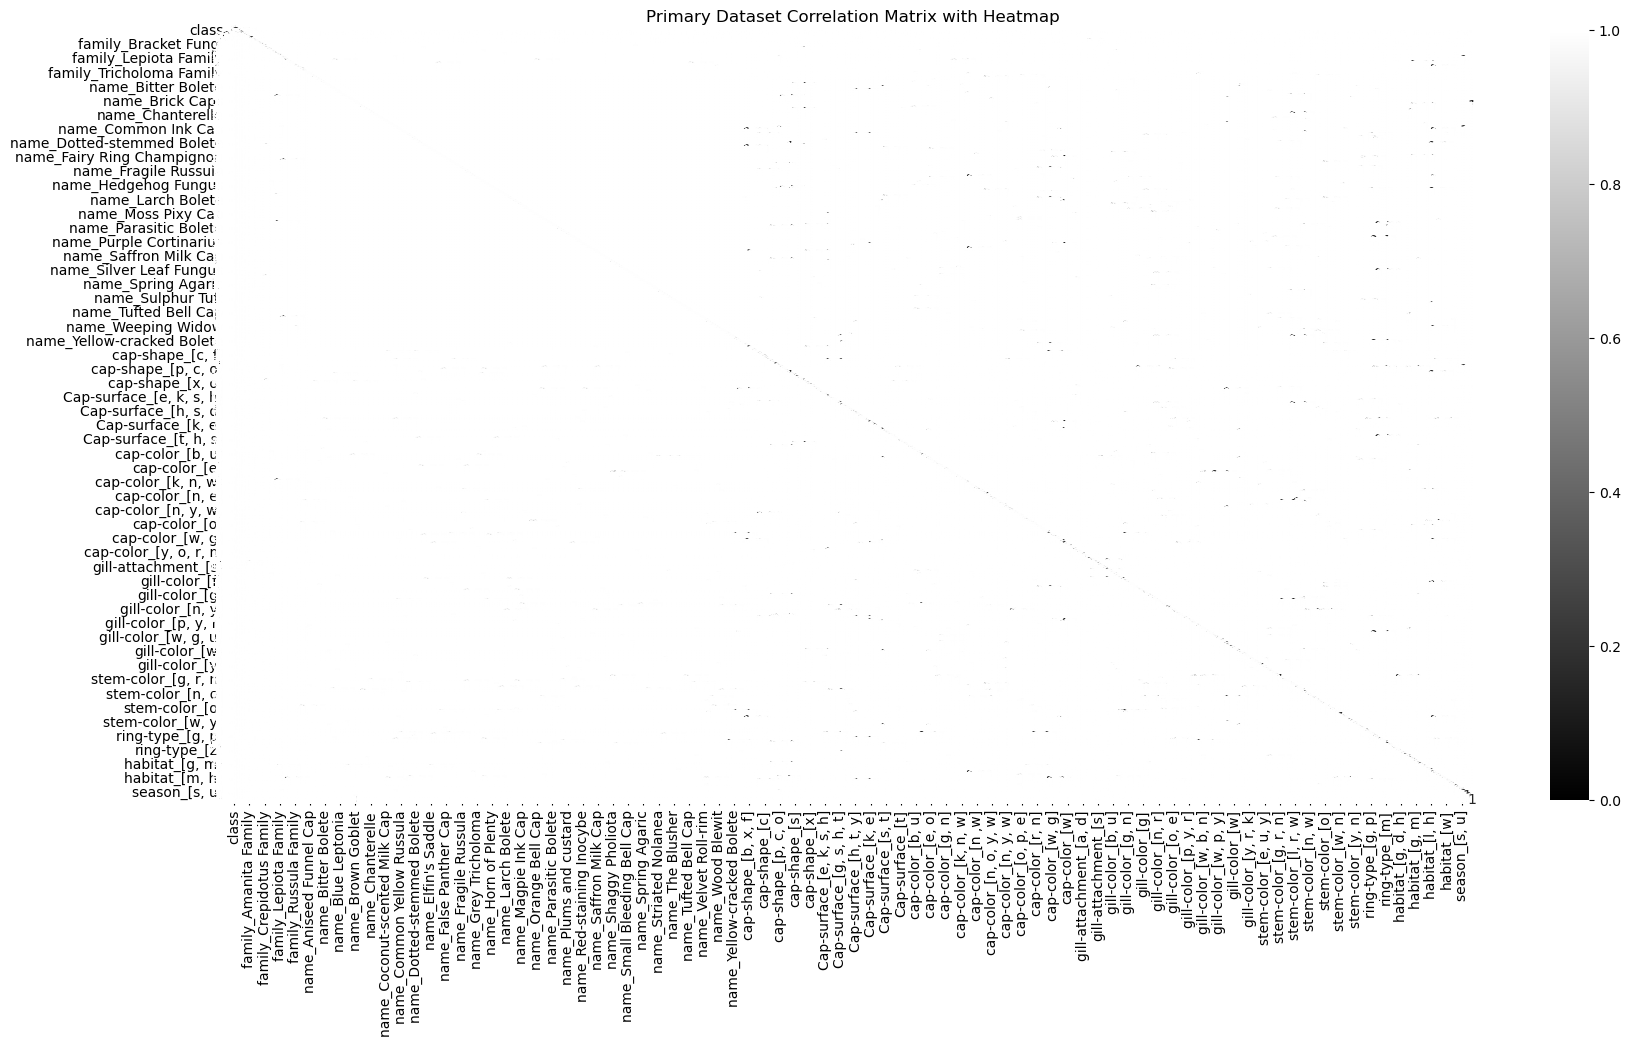

In [48]:
# Auto-Correlation - Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="gray", vmin=0, vmax=1)
plt.title('Primary Dataset Correlation Matrix with Heatmap')
plt.show()

### 4.2.) Secondary Dataset

In [49]:
corr_matrix = df2.corr()
print("Auto Correlations: ")
print(corr_matrix)

Auto Correlations: 
                         class  cap-diameter  does-bruise-or-bleed  \
class                 1.000000     -0.181139             -0.019889   
cap-diameter         -0.181139      1.000000              0.179440   
does-bruise-or-bleed -0.019889      0.179440              1.000000   
stem-height          -0.121593      0.422560              0.076596   
stem-width           -0.197368      0.695330              0.183514   
...                        ...           ...                   ...   
habitat_w            -0.085139     -0.002874             -0.034924   
season_a              0.042598     -0.033213              0.037630   
season_s             -0.054119      0.027462             -0.074734   
season_u              0.037066     -0.005339              0.063454   
season_w             -0.099968      0.048154             -0.121459   

                      stem-height  stem-width  has-ring  cap-shape_b  \
class                   -0.121593   -0.197368  0.057559     0.14463

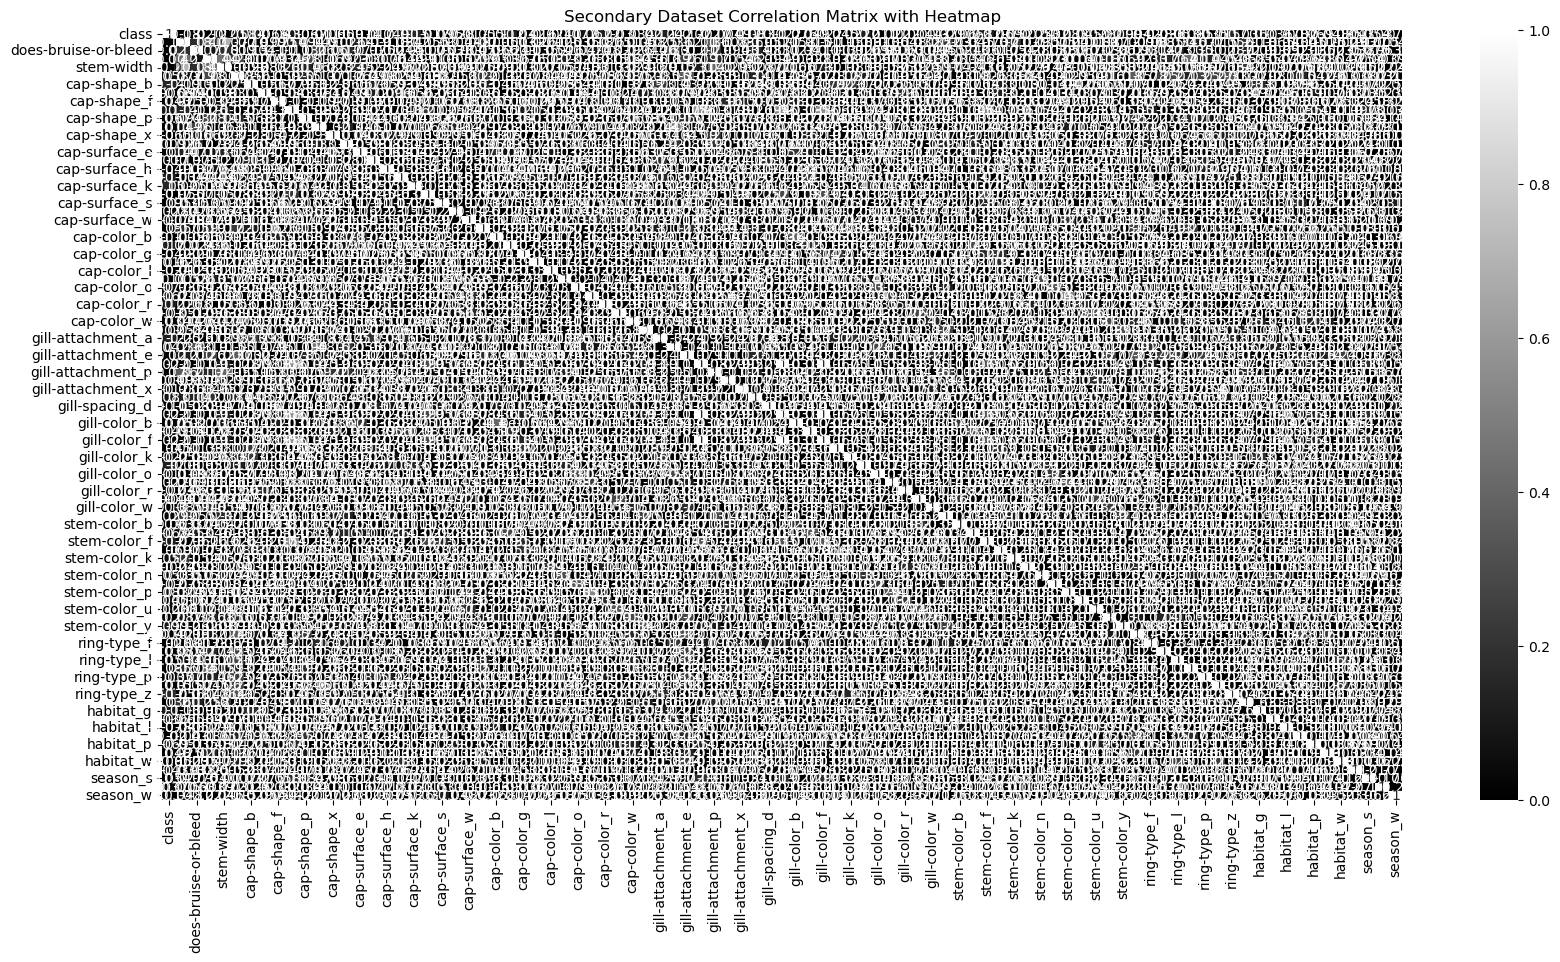

In [50]:
# Auto-Correlation - Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="gray", vmin=0, vmax=1)
plt.title('Secondary Dataset Correlation Matrix with Heatmap')
plt.show()

### 5.) Merge Datasets

In [51]:

# Create a new DataFrame for the merged data
merged_df = pd.DataFrame()

# Perform direct data mapping for matching variable names
for col_name in df1.columns:
    if col_name in df2.columns:
        # Duplicate and merge matching variable names
        merged_df[col_name + '_primary'] = df1[col_name]
        merged_df[col_name + '_secondary'] = df2[col_name]
    else:
        # Handle variables with no apparent match
        merged_df[col_name + '_primary'] = df1[col_name]
        merged_df[col_name + '_secondary'] = 0  # Add the variable with a value of 0

# Handle variables in the secondary data that do not exist in the primary data
for col_name in df2.columns:
    if col_name not in df1.columns:
        merged_df[col_name + '_primary'] = ''  # Add the variable as an empty string
        merged_df[col_name + '_secondary'] = df2[col_name]

# Rename variables in the primary data if there is a pre-existing variable name in the secondary data
for col_name in merged_df.columns:
    if col_name.endswith('_primary'):
        original_name = col_name.replace('_primary', '')
        if original_name in df2.columns:
            merged_df.rename(columns={col_name: original_name}, inplace=True)

# Save the merged data to a CSV file
# merged_data.to_csv('merged_data.csv', index=False)
merged_df

,class,class_secondary,cap-diameter,cap-diameter_secondary,does-bruise-or-bleed,does-bruise-or-bleed_secondary,stem-height,stem-height_secondary,stem-width,stem-width_secondary,...,habitat_w,habitat_w_secondary,season_a,season_a_secondary,season_s,season_s_secondary,season_u,season_u_secondary,season_w,season_w_secondary
0,1,1,15.00,15.26,0,0,17.5,16.95,17.5,17.09,...,,0.0,,0.0,,0.0,,0.0,,1.0
1,1,1,7.50,16.60,0,0,8.0,17.99,15.0,18.19,...,,0.0,,0.0,,0.0,,1.0,,0.0
2,1,1,12.50,14.07,0,0,11.0,17.80,15.0,17.74,...,,0.0,,0.0,,0.0,,0.0,,1.0
3,0,1,10.00,14.17,1,0,11.0,15.77,17.5,15.98,...,,0.0,,0.0,,0.0,,0.0,,1.0
4,1,1,8.50,14.64,0,0,11.0,16.53,15.0,17.20,...,,0.0,,0.0,,0.0,,0.0,,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,1,4.00,14.14,0,0,5.5,16.89,30.0,17.97,...,,0.0,,0.0,,0.0,,0.0,,1.0
169,1,1,3.00,12.86,0,0,3.5,16.40,15.0,16.98,...,,0.0,,1.0,,0.0,,0.0,,0.0
170,1,1,10.00,16.79,0,0,3.5,18.81,25.0,18.09,...,,0.0,,1.0,,0.0,,0.0,,0.0
171,0,1,5.50,14.18,0,0,5.5,17.87,20.0,18.20,...,,0.0,,1.0,,0.0,,0.0,,0.0


In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 1152 entries, class to season_w_secondary
dtypes: float64(576), int64(491), object(85)
memory usage: 1.5+ MB


In [53]:
merged_df.describe()

,class,class_secondary,cap-diameter,cap-diameter_secondary,does-bruise-or-bleed,does-bruise-or-bleed_secondary,stem-height,stem-height_secondary,stem-width,stem-width_secondary,...,habitat_h_secondary,habitat_l_secondary,habitat_m_secondary,habitat_p_secondary,habitat_u_secondary,habitat_w_secondary,season_a_secondary,season_s_secondary,season_u_secondary,season_w_secondary
count,173.000000,173.0,173.000000,173.000000,173.000000,173.0,173.000000,173.000000,173.000000,173.000000,...,173.0,173.0,173.0,173.0,173.0,173.0,173.000000,173.0,173.000000,173.000000
mean,0.554913,1.0,6.739306,14.829133,0.173410,0.0,6.589595,17.510925,12.157514,17.518092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.277457,0.0,0.369942,0.352601
std,0.498418,0.0,5.140185,1.587975,0.379701,0.0,3.264824,0.823350,9.858009,0.891455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.449043,0.0,0.484190,0.479167
min,0.000000,1.0,0.700000,11.020000,0.000000,0.0,0.000000,15.260000,0.000000,15.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,1.0,3.500000,13.690000,0.000000,0.0,4.500000,16.960000,5.500000,16.970000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.0,6.000000,14.940000,0.000000,0.0,6.000000,17.460000,10.000000,17.520000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.0,8.500000,16.000000,0.000000,0.0,7.500000,18.060000,15.000000,18.150000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000
max,1.000000,1.0,50.000000,18.650000,1.000000,0.0,25.000000,19.460000,70.000000,19.960000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000


### 6.) Split into Training and Testing sets

### 6.1.) Primary Dataset

In [54]:
X1 = df1.drop(["class"], axis=1).values
y1 = df1["class"].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

print("Train shape: ",X1_train.shape)
print("Test shape: ",X1_test.shape)

Train shape:  (138, 490)
Test shape:  (35, 490)


### 6.2.) Secondary Dataset

In [55]:
X2 = df2.drop(["class"], axis=1).values
y2 = df2["class"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

print("Train shape: ",X2_train.shape)
print("Test shape: ",X2_test.shape)

Train shape:  (48855, 90)
Test shape:  (12214, 90)


### 7.) Apply Machine Learning Models and Report Performances

In [56]:
# ML Classification Models
gnb_model = GaussianNB()
logistic_model = LogisticRegression()
lda_model = LinearDiscriminantAnalysis()
rf_model = RandomForestClassifier()

In [57]:
# Create Accuracy and F2 scores list for BoxPlot
acc_scoresList = []
f2_scoresList = []

In [58]:
# classification performance with cross validation
def classification_performance(X_train, y_train, model):
    # Define K-fold for cross validation, and f2 scoring
    accuracy_scores = []
    f2_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    f2 = make_scorer(fbeta_score, beta=2)
    # Perform cross validation for prediction
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
    f2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=f2)
    # Add Accuracy and F2 scores for BoxPlot
    acc_scoresList.append(accuracy_scores)
    f2_scoresList.append(f2_scores)
    # Accuracy and F2 Result for each ML models
    print('Accuracy Score:', accuracy_scores.mean())
    print('F2 Score:', f2_scores.mean())

In [59]:
print(acc_scoresList)
print(f2_scoresList)

[]
[]


### 7.1.) Primary Dataset

In [60]:
print("Prediction on Primary Dataset with GaussianNB:")
classification_performance(X1_train, y1_train, gnb_model)

Prediction on Primary Dataset with GaussianNB:
Accuracy Score: 0.5153439153439153
F2 Score: 0.45655528437171566


In [61]:
print("Prediction on Primary Dataset with Logistic Regression:")
classification_performance(X1_train, y1_train, logistic_model)

Prediction on Primary Dataset with Logistic Regression:
Accuracy Score: 0.5584656084656084
F2 Score: 0.6487321528939312


In [62]:
print("Prediction on Primary Dataset with Linear Discriminant Analysis:")
classification_performance(X1_train, y1_train, lda_model)

Prediction on Primary Dataset with Linear Discriminant Analysis:
Accuracy Score: 0.5502645502645502
F2 Score: 0.6958376254916278


In [63]:
print("Prediction on Primary Dataset with Random Forest Classifier:")
classification_performance(X1_train, y1_train, rf_model)

Prediction on Primary Dataset with Random Forest Classifier:
Accuracy Score: 0.5653439153439154
F2 Score: 0.7176333046199532


### 7.2.) Secondary Dataset

In [64]:
print("Prediction on Secondary Dataset with GaussianNB:")
classification_performance(X2_train, y2_train, gnb_model)

Prediction on Secondary Dataset with GaussianNB:
Accuracy Score: 0.7206222495138676
F2 Score: 0.7687829700332497


In [65]:
print("Prediction on Secondary Dataset with Logistic Regression:")
classification_performance(X2_train, y2_train, logistic_model)

Prediction on Secondary Dataset with Logistic Regression:
Accuracy Score: 0.7768703305700543
F2 Score: 0.7947521523101984


In [66]:
print("Prediction on Secondary Dataset with Linear Discriminant Analysis:")
classification_performance(X2_train, y2_train, lda_model)

Prediction on Secondary Dataset with Linear Discriminant Analysis:
Accuracy Score: 0.7779961109405382
F2 Score: 0.7923093322688965


In [67]:
print("Prediction on Secondary Dataset with Random Forest Classifier:")
classification_performance(X2_train, y2_train, rf_model)

Prediction on Secondary Dataset with Random Forest Classifier:
Accuracy Score: 0.9999181250639648
F2 Score: 0.9999557690972001


### 7.3.) Visualize ML Performance with BoxPlot

In [68]:
# Show Accuracy and F2 of all models in both dataset
print("Accuracy")
print(acc_scoresList)
print("F2")
print(f2_scoresList)

Accuracy
[array([0.46428571, 0.64285714, 0.32142857, 0.48148148, 0.66666667]), array([0.35714286, 0.64285714, 0.60714286, 0.51851852, 0.66666667]), array([0.60714286, 0.57142857, 0.53571429, 0.55555556, 0.48148148]), array([0.46428571, 0.64285714, 0.57142857, 0.55555556, 0.59259259]), array([0.72264865, 0.71855491, 0.71415413, 0.72336506, 0.7243885 ]), array([0.78292908, 0.77412752, 0.77402518, 0.77770955, 0.77556033]), array([0.7792447 , 0.77914236, 0.77596971, 0.77709549, 0.7785283 ]), array([0.99989766, 1.        , 0.99979531, 0.99989766, 1.        ])]
F2
[array([0.40697674, 0.73170732, 0.28985507, 0.25423729, 0.6       ]), array([0.43956044, 0.73170732, 0.73333333, 0.64285714, 0.69620253]), array([0.65217391, 0.75581395, 0.61643836, 0.8       , 0.6547619 ]), array([0.63829787, 0.81395349, 0.77922078, 0.63380282, 0.72289157]), array([0.76511405, 0.76587476, 0.76243134, 0.77587472, 0.77461998]), array([0.7979141 , 0.7944463 , 0.79510309, 0.79383754, 0.79245974]), array([0.79110012, 0

In [69]:
# Show Accuracy of all models in both dataset
print("Accuracy for Primary")
print(acc_scoresList[:4])
print("Accuracy for Secondary")
print(acc_scoresList[4:])

Accuracy for Primary
[array([0.46428571, 0.64285714, 0.32142857, 0.48148148, 0.66666667]), array([0.35714286, 0.64285714, 0.60714286, 0.51851852, 0.66666667]), array([0.60714286, 0.57142857, 0.53571429, 0.55555556, 0.48148148]), array([0.46428571, 0.64285714, 0.57142857, 0.55555556, 0.59259259])]
Accuracy for Secondary
[array([0.72264865, 0.71855491, 0.71415413, 0.72336506, 0.7243885 ]), array([0.78292908, 0.77412752, 0.77402518, 0.77770955, 0.77556033]), array([0.7792447 , 0.77914236, 0.77596971, 0.77709549, 0.7785283 ]), array([0.99989766, 1.        , 0.99979531, 0.99989766, 1.        ])]


In [70]:
# Show F2 of all models in both dataset
print("F2 for Primary")
print(f2_scoresList[:4])
print("F2 for Secondary")
print(f2_scoresList[4:])

F2 for Primary
[array([0.40697674, 0.73170732, 0.28985507, 0.25423729, 0.6       ]), array([0.43956044, 0.73170732, 0.73333333, 0.64285714, 0.69620253]), array([0.65217391, 0.75581395, 0.61643836, 0.8       , 0.6547619 ]), array([0.63829787, 0.81395349, 0.77922078, 0.63380282, 0.72289157])]
F2 for Secondary
[array([0.76511405, 0.76587476, 0.76243134, 0.77587472, 0.77461998]), array([0.7979141 , 0.7944463 , 0.79510309, 0.79383754, 0.79245974]), array([0.79110012, 0.79640095, 0.78859743, 0.7930223 , 0.79242585]), array([1.        , 1.        , 0.99981611, 0.99996274, 1.        ])]


Text(0.5, 0.98, 'F2 Scores')

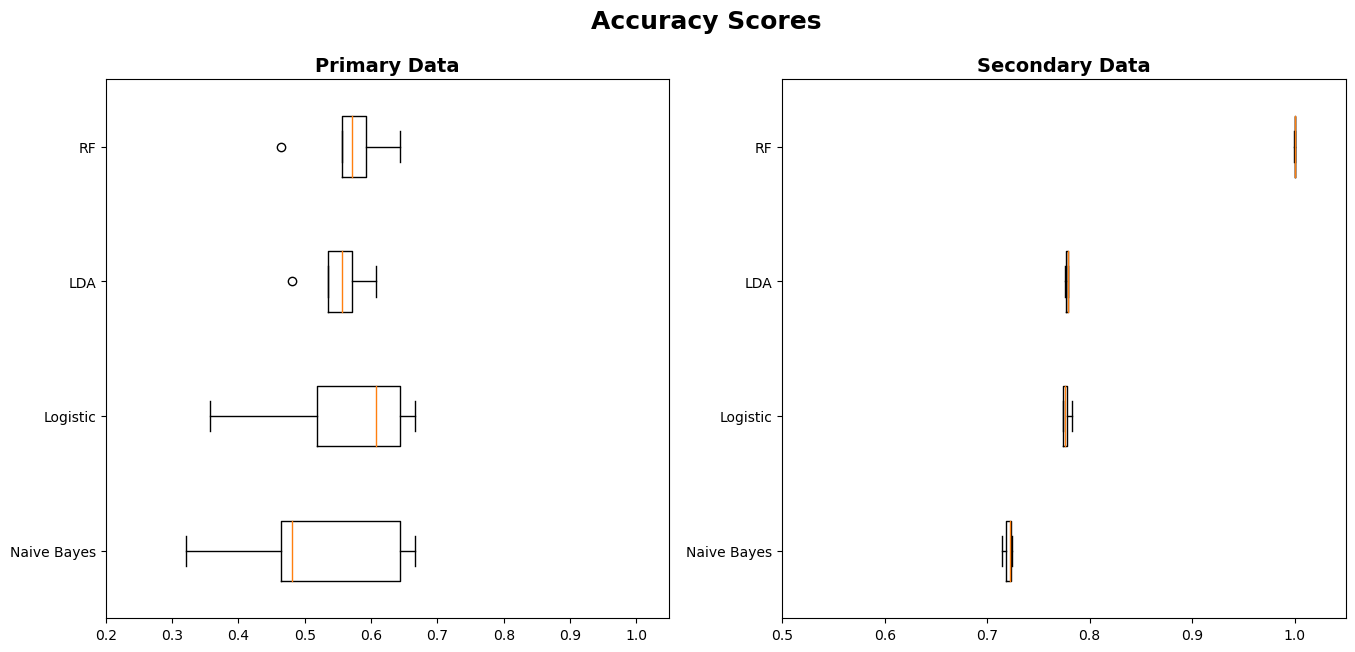

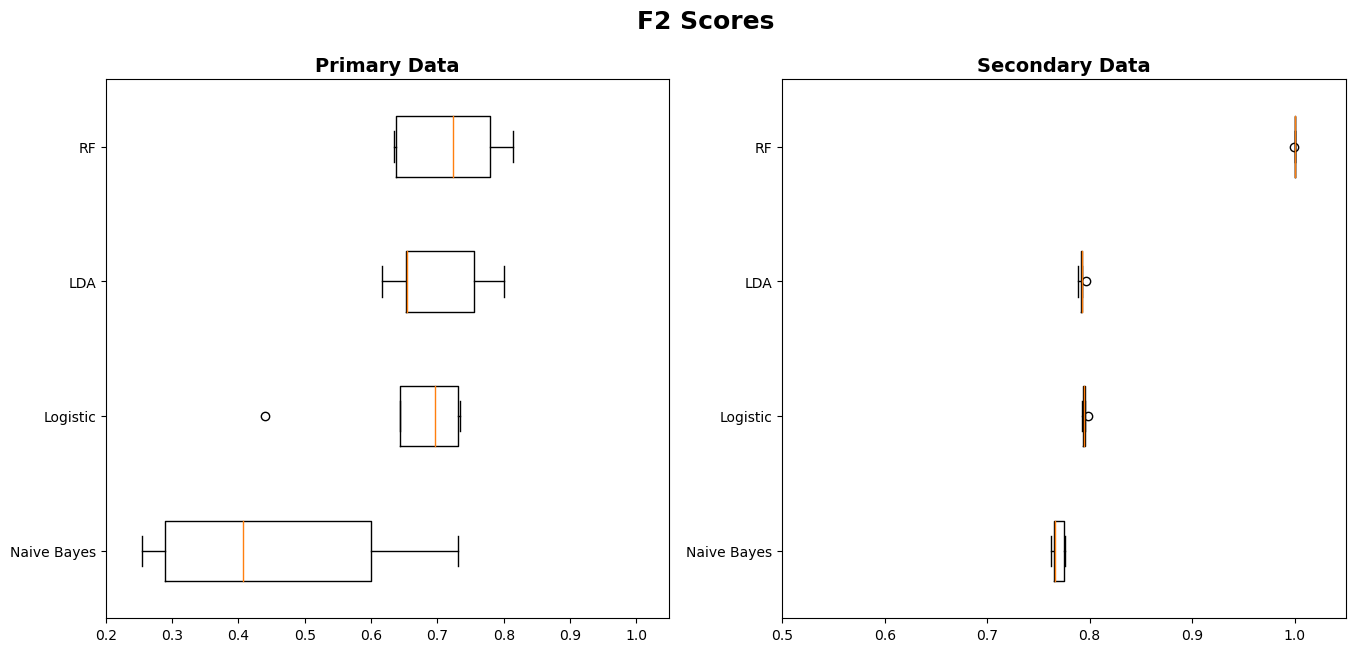

In [71]:
# Accuracy BoxPlot #
Accfig, (ax1Acc, ax2Acc) = plt.subplots(1,2,figsize=(16,7))

# Secondary
ax2Acc.boxplot(acc_scoresList[4:], vert=False)
ax2Acc.set_title("Secondary Data", fontsize=14, fontweight='bold')

models = ['Naive Bayes', 'Logistic', 'LDA', 'RF']
ax2Acc.set_yticks(range(1, len(models) + 1), models)
ax2Acc.set_xlim(0.5,1.05)

# Primary
ax1Acc.boxplot(acc_scoresList[:4], vert=False)
ax1Acc.set_title("Primary Data", fontsize=14, fontweight='bold')

ax1Acc.set_yticks(range(1, len(models) + 1), models)
ax1Acc.set_xlim(0.2,1.05)

# Show BoxPlot
Accfig.suptitle('Accuracy Scores', fontsize=18, fontweight='bold')

#####

# F2 BoxPlot #
F2fig, (ax1F2, ax2F2) = plt.subplots(1,2,figsize=(16,7))

# Secondary
ax2F2.boxplot(f2_scoresList[4:], vert=False)
ax2F2.set_title("Secondary Data", fontsize=14, fontweight='bold')

ax2F2.set_yticks(range(1, len(models) + 1), models)
ax2F2.set_xlim(0.5,1.05)

# Primary
ax1F2.boxplot(f2_scoresList[:4], vert=False)
ax1F2.set_title("Primary Data", fontsize=14, fontweight='bold')

ax1F2.set_yticks(range(1, len(models) + 1), models)
ax1F2.set_xlim(0.2,1.05)

# Show BoxPlot
F2fig.suptitle('F2 Scores', fontsize=18, fontweight='bold')

### 8.) Apply ML Models and Performances without Cross-Validation (Extra/Optional)

In [ ]:
# The following is optional since I have written ML models function without using cross-validation first.
# However,it is also great to compare different results between these two.

In [72]:
def classification_model(X_train, y_train, X_for_pred, y_to_pred):
    # Fit Model
    gnb_model.fit(X_train, y_train)
    logistic_model.fit(X_train, y_train)
    lda_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    # Model for Prediction on Testing or Training data
    gnb_y_pred = gnb_model.predict(X_for_pred)
    lr_y_pred = logistic_model.predict(X_for_pred)
    lda_y_pred = lda_model.predict(X_for_pred)
    rf_y_pred = rf_model.predict(X_for_pred)
    # Predict Accuracy on Testing or Training data
    accuracyGNB = accuracy_score(y_to_pred, gnb_y_pred)
    accuracyLR = accuracy_score(y_to_pred, lr_y_pred)
    accuracyLDA = accuracy_score(y_to_pred, lda_y_pred)
    accuracyRF = accuracy_score(y_to_pred, rf_y_pred)
    # Predict F2 on Testing or Training data
    f2GNB = fbeta_score(y_to_pred, gnb_y_pred, beta=2)
    f2LR = fbeta_score(y_to_pred, lr_y_pred, beta=2)
    f2LDA = fbeta_score(y_to_pred, lda_y_pred, beta=2)
    f2RF = fbeta_score(y_to_pred, rf_y_pred, beta=2)
    # Accuracy Result for each ML models
    print(f'Accuracy Score for GaussianNB: {accuracyGNB:.2f}')
    print(f'Accuracy Score for Logistic Regression: {accuracyLR:.2f}')
    print(f'Accuracy Score for Linear Discriminant Analysis: {accuracyLDA:.2f}')
    print(f'Accuracy Score for Random Forest Classifier: {accuracyRF:.2f}')
    # F2 Result for each ML models
    print(f'F2 Score for GaussianNB: {f2GNB:.2f}')
    print(f'F2 Score for Logistic Regression: {f2LR:.2f}')
    print(f'F2 Score for Linear Discriminant Analysis: {f2LDA:.2f}')
    print(f'F2 Score for Random Forest Classifier: {f2RF:.2f}')

### 8.1.) Primary Datasets (Extra/Optional)

In [73]:
# Primary Testing Data
print("Prediction on Testing Data for Primary Dataset:")
classification_model(X1_train, y1_train, X1_test, y1_test)

Prediction on Testing Data for Primary Dataset:
Accuracy Score for GaussianNB: 0.66
Accuracy Score for Logistic Regression: 0.74
Accuracy Score for Linear Discriminant Analysis: 0.51
Accuracy Score for Random Forest Classifier: 0.69
F2 Score for GaussianNB: 0.58
F2 Score for Logistic Regression: 0.77
F2 Score for Linear Discriminant Analysis: 0.63
F2 Score for Random Forest Classifier: 0.75


In [74]:
# Primary Training Data
print("Prediction on Training Data for Primary Dataset:")
classification_model(X1_train, y1_train, X1_train, y1_train)

Prediction on Training Data for Primary Dataset:
Accuracy Score for GaussianNB: 1.00
Accuracy Score for Logistic Regression: 0.99
Accuracy Score for Linear Discriminant Analysis: 0.70
Accuracy Score for Random Forest Classifier: 1.00
F2 Score for GaussianNB: 1.00
F2 Score for Logistic Regression: 1.00
F2 Score for Linear Discriminant Analysis: 0.78
F2 Score for Random Forest Classifier: 1.00


### 8.2.) Secondary Datasets (Extra/Optional)

In [75]:
# Secondary Testing Data
print("Prediction on Testing Data for Secondary Dataset:")
classification_model(X2_train, y2_train, X2_test, y2_test)

Prediction on Testing Data for Secondary Dataset:
Accuracy Score for GaussianNB: 0.71
Accuracy Score for Logistic Regression: 0.78
Accuracy Score for Linear Discriminant Analysis: 0.78
Accuracy Score for Random Forest Classifier: 1.00
F2 Score for GaussianNB: 0.76
F2 Score for Logistic Regression: 0.79
F2 Score for Linear Discriminant Analysis: 0.79
F2 Score for Random Forest Classifier: 1.00


In [76]:
# Secondary Training Data
print("Prediction on Training Data for Secondary Dataset:")
classification_model(X2_train, y2_train, X2_train, y2_train)

Prediction on Training Data for Secondary Dataset:
Accuracy Score for GaussianNB: 0.72
Accuracy Score for Logistic Regression: 0.78
Accuracy Score for Linear Discriminant Analysis: 0.78
Accuracy Score for Random Forest Classifier: 1.00
F2 Score for GaussianNB: 0.77
F2 Score for Logistic Regression: 0.79
F2 Score for Linear Discriminant Analysis: 0.79
F2 Score for Random Forest Classifier: 1.00


### Reference
This project was based on the research paper "Mushroom data creation, curation, and simulation to support classification tasks" by Dennis Wagner, Dominik Heider & Georges Hattab.

Link to Research Paper:https://www.nature.com/articles/s41598-021-87602-3

Link to both dataset: https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset#